# Case Study

#### By Leila Khaertdinova, B21-DS02

---


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [ ]:
ds = pd.read_csv('hcmv.data.txt')

In [ ]:
ds.describe()

,location
count,296.000000
mean,116960.104730
std,64732.033538
min,177.000000
25%,63714.000000
50%,117826.000000
75%,171143.500000
max,228953.000000


**Random scatter**



Let us first simulate several random scatters:

In [ ]:
locations = ds['location']
count = np.arange(1, ds.shape[0] + 1)

random_scatters = []
random_size = 3

for _ in range(random_size):
    random_scatters.append(np.random.randint(min(locations), max(locations), size=len(locations)))

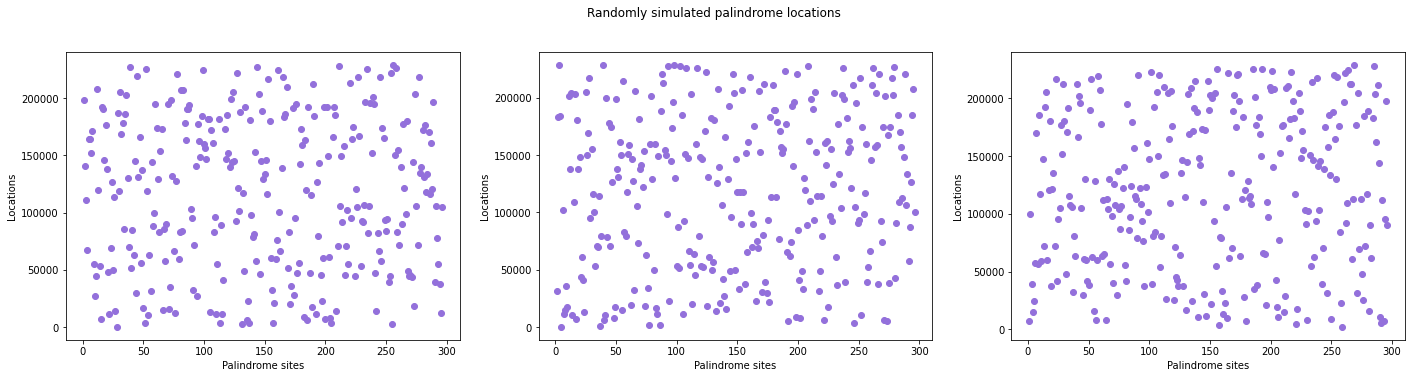

In [ ]:
plt.figure(figsize=(24, 18))
for i in range(random_size):
    plt.subplot(331 + i)
    plt.scatter(count, random_scatters[i] , color='mediumpurple')
    plt.xlabel('Palindrome sites')
    plt.ylabel('Locations')

plt.suptitle('Randomly simulated palindrome locations', y=0.915)

plt.show()

Let us now visualize real data:

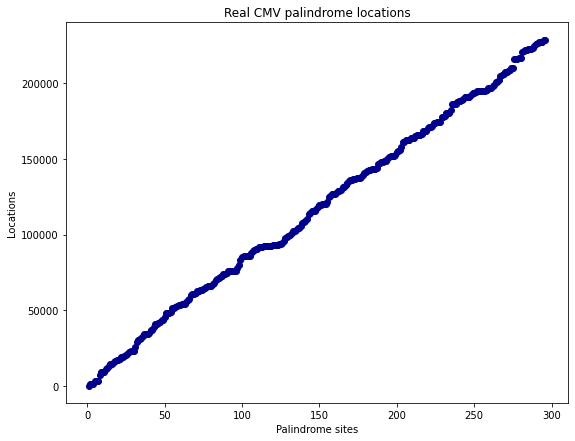

In [ ]:
plt.figure(figsize=(9, 7))

plt.scatter(count, locations , color='darkblue')

plt.title('Real CMV palindrome locations')
plt.xlabel('Palindrome sites')
plt.ylabel('Locations')

plt.show()

**Locations and spacings**

Let us now examine the spacings between consecutive palindroms, sums of consecutive pairs and triplet palindroms spacings for the real data:

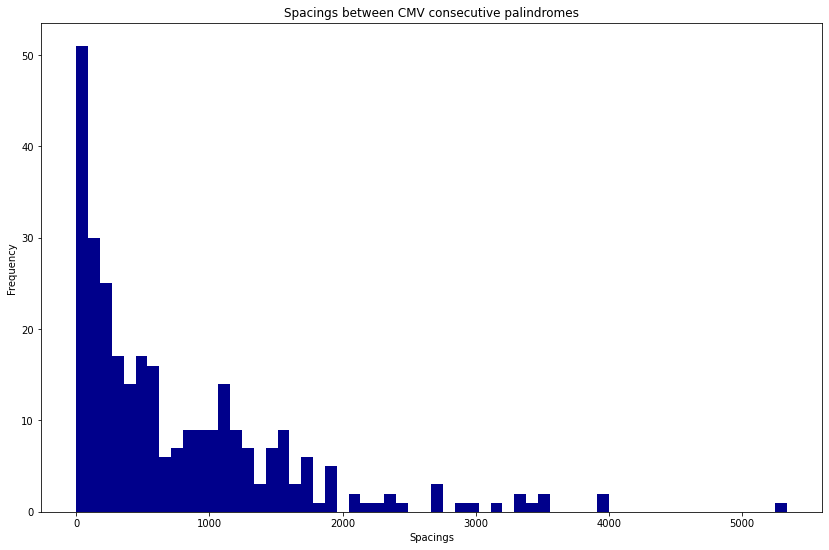

In [ ]:
spacings = []
for i in range(len(count) - 1):
    spacings.append(locations[i + 1] - locations[i])

plt.figure(figsize=(14, 9))
plt.hist(spacings, bins=60, color='darkblue')

plt.title('Spacings between CMV consecutive palindromes')
plt.xlabel('Spacings')
plt.ylabel('Frequency')

plt.show()

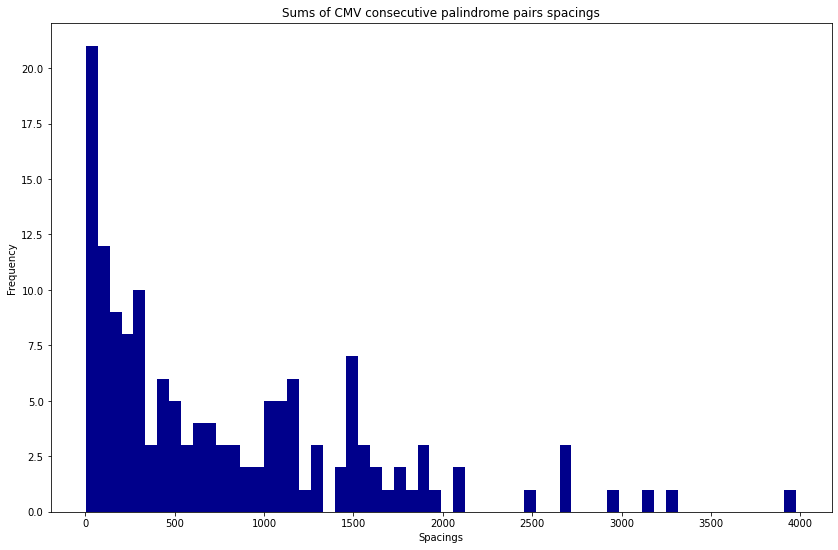

In [ ]:
pairs = []
for i in range(0, len(count), 2):
    pairs.append(locations[i] + locations[i + 1])

pairs_spacings = []
for i in range(len(pairs) - 1):
     pairs_spacings.append(locations[i + 1] - locations[i])

plt.figure(figsize=(14, 9))
plt.hist(pairs_spacings, bins=60, color='darkblue')

plt.title('Sums of CMV consecutive palindrome pairs spacings')
plt.xlabel('Spacings')
plt.ylabel('Frequency')

plt.show()

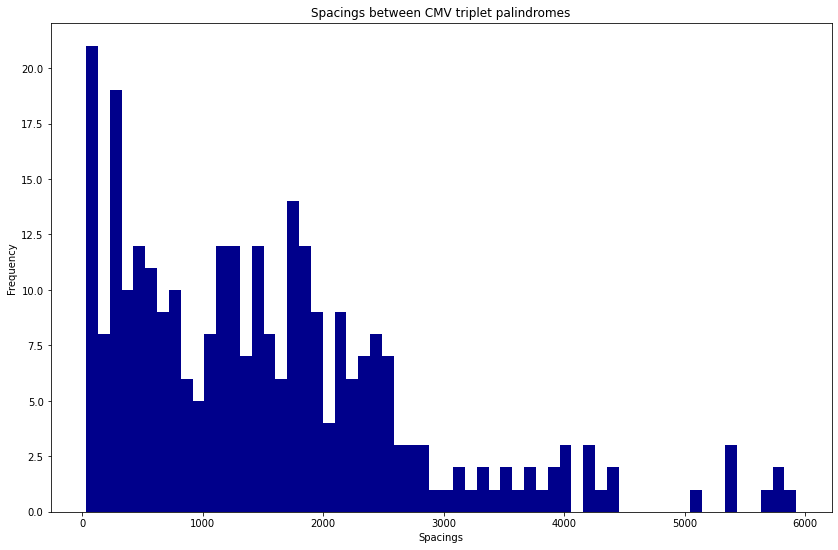

In [ ]:
triplet_spacings = []
for i in range(len(count) - 2):
    triplet_spacings.append(locations[i + 2] - locations[i])

plt.figure(figsize=(14, 9))
plt.hist(triplet_spacings, bins=60, color='darkblue')

plt.title('Spacings between CMV triplet palindromes')
plt.xlabel('Spacings')
plt.ylabel('Frequency')

plt.show()

Let's repeat the procedure for the random scatters and compare the results of real data and simulated random data:

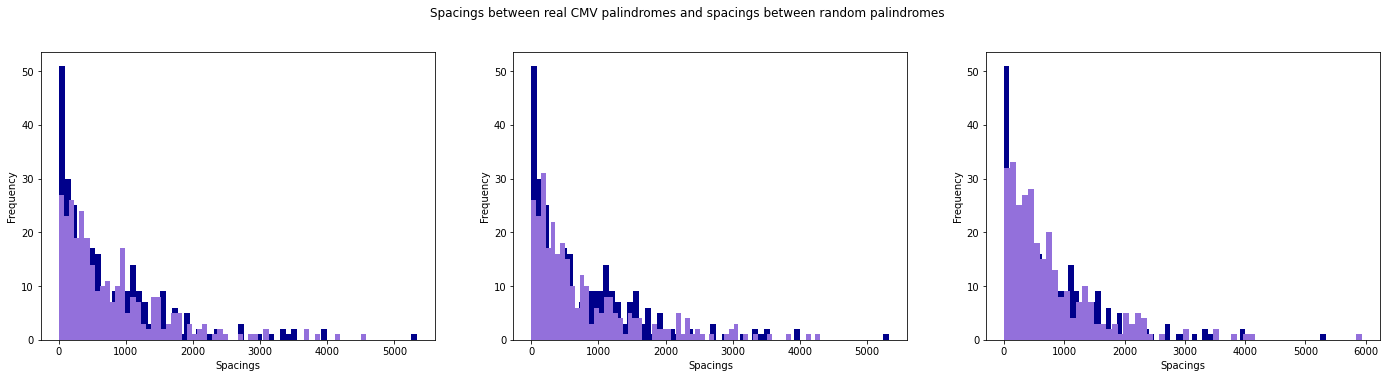

In [ ]:
plt.figure(figsize=(24, 18))

for i in range(random_size):
    sorted_scatters = sorted(random_scatters[i])
    random_spacings = [sorted_scatters[j + 1] - sorted_scatters[j] for j in range(len(count) - 1)]
    plt.subplot(331 + i)
    plt.hist(spacings, bins=60, color='darkblue')
    plt.hist(random_spacings, bins=60, color='mediumpurple')
    plt.xlabel('Spacings')
    plt.ylabel('Frequency')
    

plt.suptitle('Spacings between real CMV palindromes and spacings between random palindromes ', y=0.915)

plt.show()

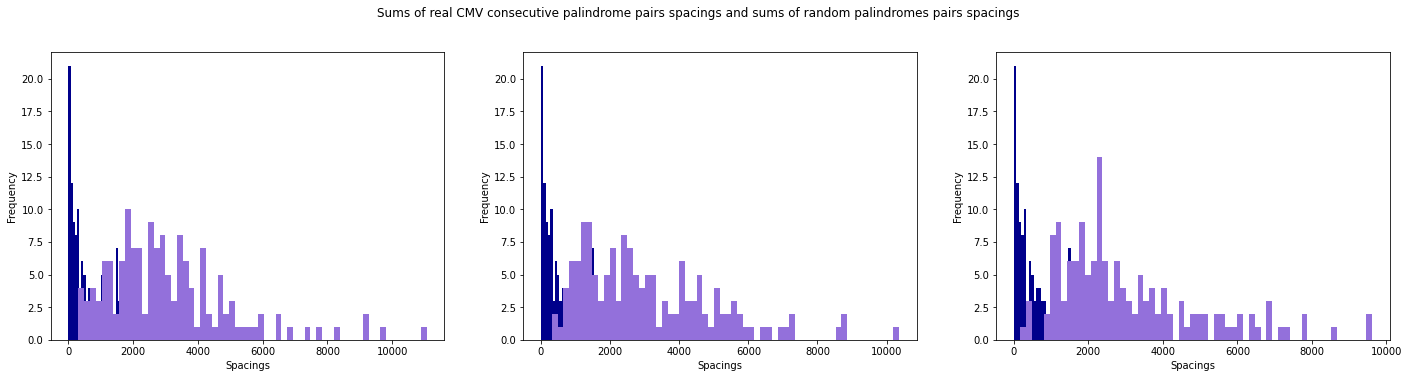

In [ ]:
plt.figure(figsize=(24, 18))
pairs_random = []

for i in range(random_size):
    sorted_scatters = sorted(random_scatters[i])
    pair_random = [sorted_scatters[j] + sorted_scatters[j + 1] for j in range(0, len(count) - 1, 2)]
    pairs_random.append(pair_random)

for i in range(random_size):
    random_spacings = [pairs_random[i][j + 1] - pairs_random[i][j] for j in range(len(pairs_random[i]) - 1)]
    plt.subplot(331 + i)
    plt.hist(pairs_spacings, bins=60, color='darkblue')
    plt.hist(random_spacings, bins=60, color='mediumpurple')
    plt.xlabel('Spacings')
    plt.ylabel('Frequency')
    
plt.suptitle('Sums of real CMV consecutive palindrome pairs spacings and sums of random palindromes pairs spacings', y=0.915)

plt.show()

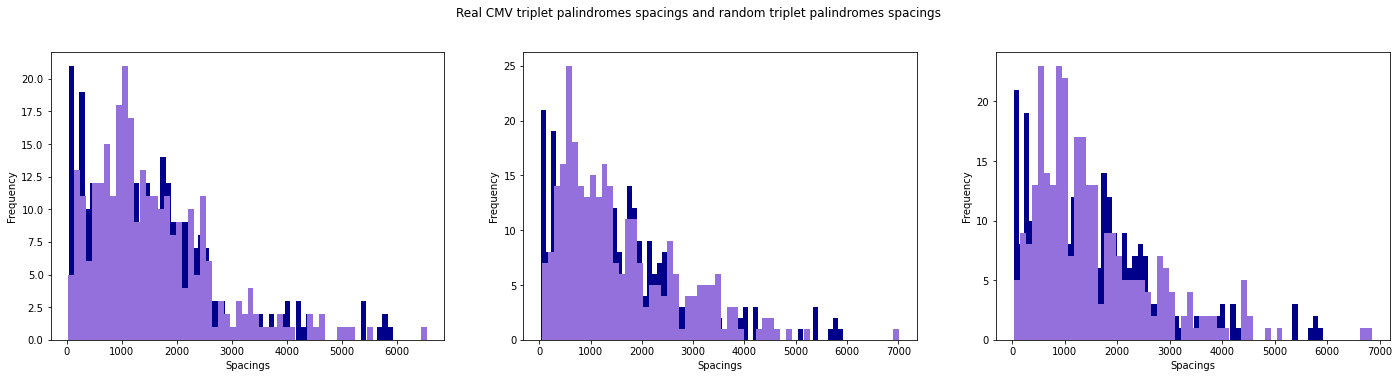

In [ ]:
plt.figure(figsize=(24, 18))

for i in range(random_size):
    sorted_scatters = sorted(random_scatters[i])
    random_triplets = [sorted_scatters[j + 2] - sorted_scatters[j] for j in range(len(count) - 2)]
    plt.subplot(331 + i)
    plt.hist(triplet_spacings, bins=60, color='darkblue')
    plt.hist(random_triplets, bins=60, color='mediumpurple')
    plt.xlabel('Spacings')
    plt.ylabel('Frequency')
    
plt.suptitle('Real CMV triplet palindromes spacings and random triplet palindromes spacings', y=0.915)
plt.xlabel('Spacings')
plt.ylabel('Frequency')

plt.show()

**Counts**

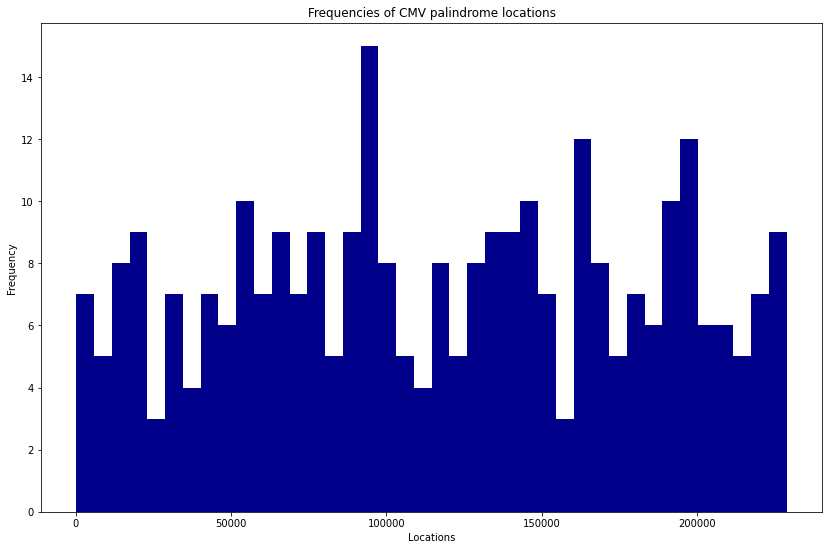

In [ ]:
plt.figure(figsize=(14, 9))

plt.hist(locations, bins=40, color='darkblue')

plt.title('Frequencies of CMV palindrome locations')
plt.xlabel('Locations')
plt.ylabel('Frequency')

plt.show()

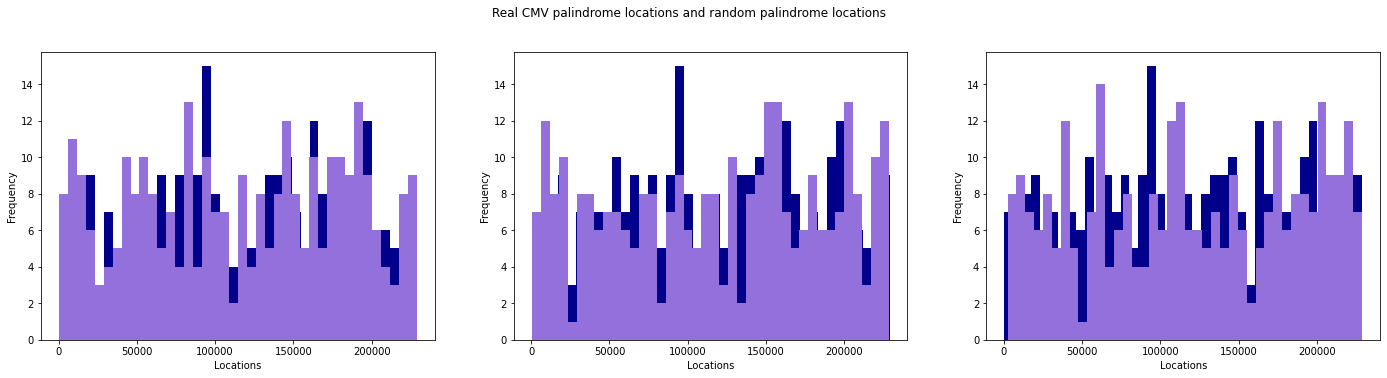

In [ ]:
plt.figure(figsize=(24, 18))

for i in range(random_size):
    plt.subplot(331 + i)
    plt.hist(locations, bins=40, color='darkblue')
    plt.hist(random_scatters[i], bins=40, color='mediumpurple')
    plt.xlabel('Locations')
    plt.ylabel('Frequency')
    
plt.suptitle('Real CMV palindrome locations and random palindrome locations', y=0.915)

plt.show()

As can be seen from the visualizations in this part, the original data appears to align with the pattern of random scatters. This result were obtained by dividing the bins into small intervals, each comprising 5500 palindrome locations. By specifying such intervals (5500), we can determine that the palindrome clusters appear to be located in the range of [83500, 94500].

To test whether original data is uniformly distributed, the Chi-Square goodness of fit test can be performed:

In [ ]:
observed_counts = np.histogram(locations, bins=40)[0]

scatter = sorted(random_scatters[2])
expected_counts = np.random.uniform(0, 15, 40)

p_value = chi2_contingency([observed_counts, expected_counts])[1]

print(f'p-value: {p_value:.10f}')

p-value: 0.0716651766


The obtained p-value indicates a insignificant difference between the observed and expected unform scatter. As a result, we can determine that original data is uniformly distributed.




**The biggest cluster**

Let us again analyze the frequency histogram:

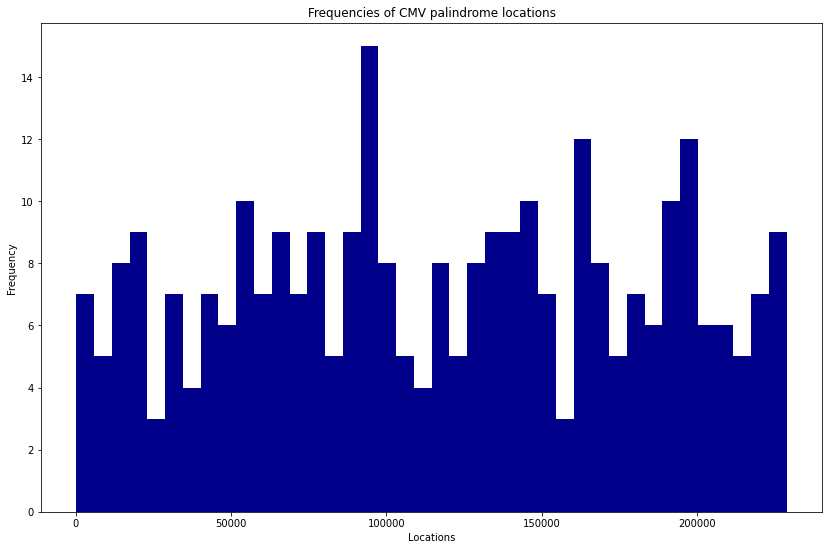

In [ ]:
plt.figure(figsize=(14, 9))

plt.hist(locations, bins=40, color='darkblue')

plt.title('Frequencies of CMV palindrome locations')
plt.xlabel('Locations')
plt.ylabel('Frequency')

plt.show()

Based on the analysis, it can be recommended for biologists to focus their investigation on the DNA region in the range of [83500, 94500] (based on the visualizations of original data above), as this is where the clusters of palindromes are most densely located and maybe could potentially indicate a replication site. 